 <font size=6> **实验6 决策树**</font>

- 理解决策树(DT)概念，特点和三种基本类型；
- 理解ID3、C4.5、CART三种算法的基本原理、适用场景，掌握熵、条件熵、信息增益、信息增益比、基尼指数等指标的含义及计算方法；
- 掌握DecisionTreeClassifier的基本用法；
- 理解决策树可视化操作的基本步骤。


# 题目1
请根据以下数据集内容，列表计算相关指标

In [ ]:
import pandas as pd
data = pd.read_csv('AllElectronics.csv')

## 信息增益比

**（1）特征“有工作”、“有自己的房子”、“信贷情况”的信息增益比**  

### “有工作”的信息增益比

计算经验熵  
$H(D) = -\dfrac{9}{15}\log_2\dfrac{9}{15} - \dfrac{6}{15} \log_2\dfrac{6}{15}$


In [ ]:
import numpy as np

-9/15*np.log2(9/15) - 6/15*np.log2(6/15)

0.9709505944546686

计算条件熵  
$H(D|有工作) = \dfrac{5}{15} \times 0 + \dfrac{10}{15} \times ( -\dfrac{6}{10}  log_2\dfrac{6}{10} - \dfrac{4}{10} log_2\dfrac{4}{10} )$

In [ ]:
5/15 * 0 + 10/15 * ( -6/10 * np.log2(6/10) - 4/10 * np.log2(4/10) )

0.6473003963031123

计算分母  
$H有工作(D) = -\dfrac{10}{15}\log_2\dfrac{10}{15} - \dfrac{5}{15} \log_2\dfrac{5
 }{15}$

In [ ]:
-10/15*np.log2(10/15) - 5/15*np.log2(5/15)

0.9182958340544896

"有工作"的信息增益比   $\dfrac{𝐻(𝐷) - H(D|有工作)} {𝐻有工作(𝐷)}$

In [ ]:
(0.971 - 0.6473) / 0.9183

0.35249918327344004

- 特征“有工作”的信息增益比 = 0.3525

### “有自己的房子”的信息增益比

In [ ]:
0.971-(6/15 * 0 + 10/15 * ( -6/9 * np.log2(6/9) - 3/9 * np.log2(3/9) ))

0.35880277729700694

In [ ]:
-9/15*np.log2(9/15) - 6/15*np.log2(6/15)

0.9709505944546686

In [ ]:
(0.971 - (6/15 * 0 + 10/15 * ( -6/9 * np.log2(6/9) - 3/9 * np.log2(3/9) ))) / (-9/15*np.log2(9/15) - 6/15*np.log2(6/15))

0.36953762564873593

### “信贷情况”的信息增益比

In [ ]:
-(5/14)*np.log2(5/14)-(9/14)*np.log2(9/14)

0.9402859586706311

In [ ]:
(5/14)*(-(2/5)*np.log2(2/5)-(3/5)*np.log2(3/5))+(5/14)*(-(3/5)*np.log2(3/5)-(2/5)*np.log2(2/5))+(4/14)*(-(3/4)*np.log2(3/4)-(1/4)*np.log2(1/4))

0.9253298887416583

In [ ]:
(-(5/14)*np.log2(5/14)-(9/14)*np.log2(9/14))-((5/14)*(-(2/5)*np.log2(2/5)-(3/5)*np.log2(3/5))+(5/14)*(-(3/5)*np.log2(3/5)-(2/5)*np.log2(2/5))+(4/14)*(-(3/4)*np.log2(3/4)-(1/4)*np.log2(1/4)))

0.014956069928972804

## 基尼指数

**（2）特征“有工作”、“有自己的房子”、“信贷情况”的基尼指数**

### “有工作”的基尼指数

Gini(有工作=是) = 0

Gini(有工作=否) = 6/10 * 4/10 * 2



Gini(有工作) = 5/15 * 0 + 10/15 * (6/10 * 4/10 *2)

In [ ]:
5/15 * 0 + 10/15 * (6/10 * 4/10 *2)

0.31999999999999995

特征“有工作”的基尼指数 = 0.32

### “有自己的房子”的基尼指数

In [ ]:
1 - ((7/15)**2 + (8/15)**2)

0.49777777777777776

### “信贷情况”的基尼指数

In [ ]:
1- ((3/5)**2 + (2/5)**2)

0.48

### “信贷情况-一般”的基尼指数  
(二叉树）

In [ ]:
1 - ((3/(3+5))**2 + (5/(3+5))** 2)

0.46875

# 题目2
data.csv文件中存储着一批数据，如第1题所示图形，	请用pandas加载数据文件，再进行数据预预处理(可考虑LabelEncoder或DictVectorizer)；再使用sklearn中DecisionTreeClassifier进行分类；并用plot_tree()或graphviz实现决策树可视化。

## 导入库

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 数据处理

### 数据获取

In [ ]:
df = pd.read_csv('AllElectronics.csv')
df.head()

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes


### 特征编码

In [ ]:
df.columns[1:-1]

Index(['age', 'income', 'student', 'credit_rating'], dtype='object')

In [ ]:
encoder = LabelEncoder()
for col in df.columns[1:-1]:
  df[col] = encoder.fit_transform(df[col])
df.head()

,RID,age,income,student,credit_rating,class_buys_computer
0,1,2,0,0,1,no
1,2,2,0,0,0,no
2,3,0,0,0,1,yes
3,4,1,2,0,1,yes
4,5,1,1,1,1,yes


## 建模  


In [ ]:
X = df.iloc[:,1:-1]
y = df.iloc[:, -1]

df = DecisionTreeClassifier()
df.fit(X, y)
df.score(X, y)

1.0

## 决策树可视化

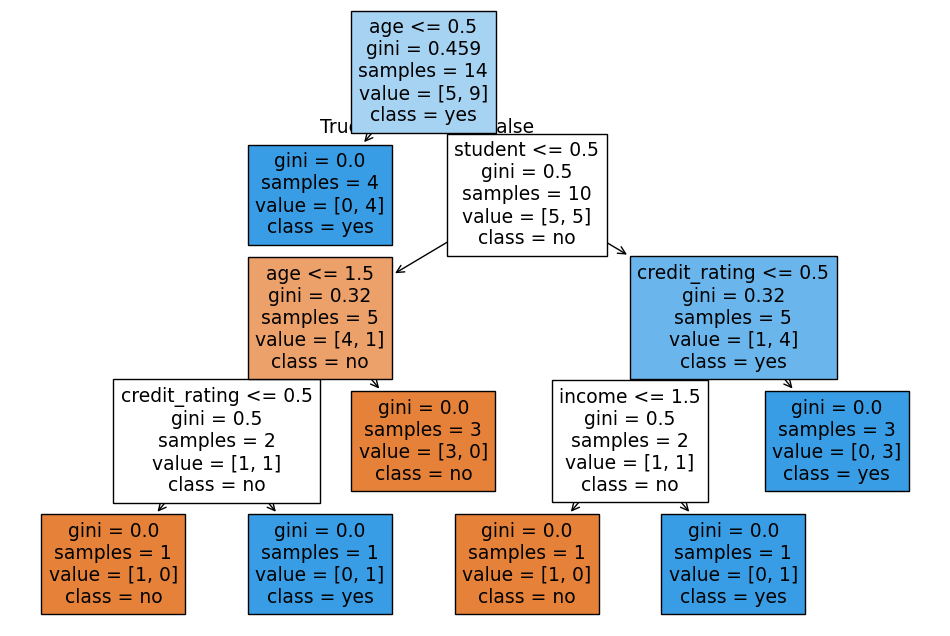

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(df, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.show()
